In [52]:
from random import choices, sample
import matplotlib.pyplot as plt
import numpy as np

## Frequentist probability

The set of all possible outcomes of a random experiment is called the sample space of the experiment. 

An event is defined as a particular subset of the sample space to be considered. For any given event, only one of two possibilities may hold: it occurs or it does not. The relative frequency of occurrence of an event, observed in a number of repetitions of the experiment, is a measure of the probability of that event. Supposedly, the relative frequency converges to a value as the number of trials increases.

Therefore, according to the frequency interpretation of probability, an event's probability is the limit of the relative frequency of the event as the number of trials approaches infinity.

For more details, see https://en.wikipedia.org/wiki/Frequentist_probability.

Classical approach = Laplace's Law = Proposition derived from Axioms of probability


### Example 1: coin toss

What is the probability of getting heads when tossing a coin? According to the frequentist approach, that value is empirical and shoud be different for each coin as every physical coin is different.

However, according to the classical approach, that assumes that heads and tails are equally probable, the probability is 1/2.

Will the relative frequency eventually converge to a specific value when the number of trials is sufficiently large? Here, we shoud run the experiment by tossing a real coin thousands of times. Instead, we are going to draw values from a distribution where heads and tails are supposed to happen with a probability of 1/2 each.

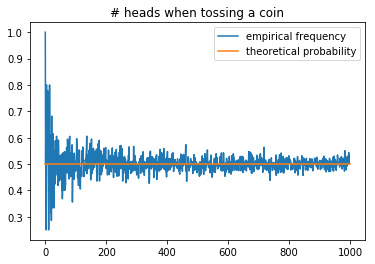

In [43]:
# toss of a coin
def coin_toss():
    num_trials = 1000
    relative_frequency_of_heads = lambda k: choices("HT", k = k).count('H')/k
    relative_frequencies_of_heads = [relative_frequency_of_heads(k) for k in range(1,num_trials)]

    plt.plot(relative_frequencies_of_heads, label = 'empirical frequency')
    plt.plot([1/2] * num_trials, label = 'theoretical probability')
    plt.title('# heads when tossing a coin')
    plt.legend()
    plt.show()

coin_toss()

### Example 2: dice roll

What is the probability of getting "1" when throwing a dice?

According to the classical approach, assuming that all 6 possible outcomes are equally probable, the probability is 1/6.

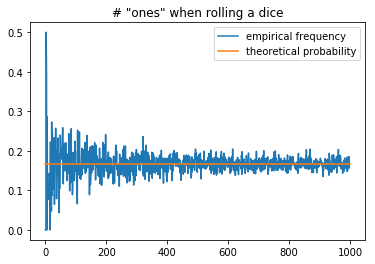

In [46]:
# roll of a dice
def dice_roll():
    num_trials = 1000
    relative_frequency_of_ones = lambda k: choices([1,2,3,4,5,6], k = k).count(1)/k
    relative_frequencies_of_ones = [relative_frequency_of_ones(k) for k in range(1,num_trials)]

    plt.plot(relative_frequencies_of_ones, label = 'empirical frequency')
    plt.plot([1/6] * num_trials, label = 'theoretical probability')
    plt.title('# "ones" when rolling a dice')
    plt.legend()
    plt.show()

dice_roll()

## Simulations
With the advent of computers, the frequentist interpretation of the probability has got a second life. Computers can simulate random experiments millions of times and calculate the limit of the relative frequency of an event. This approach is very convenient when it is not possible (or practical) to count all the outcomes of the sample space and/or the outcomes that favour an event.

Here's some examples of probability calculated by simulating the random experiment.

In [95]:
def prob(convergence_tolerance, num_trials, step, experiment):
    last_result = experiment(num_trials)

    while True:
        num_trials = num_trials + step
        new_result = experiment(num_trials)
        if abs(new_result - last_result) <= convergence_tolerance:
            print(f"convergence reached with {num_trials} trials")
            return new_result
        last_result = new_result

### What is the probability that the sum of 2 dice equals 7?

In [96]:
def two_dice_roll(num_trials):
    return list(np.array(choices([1,2,3,4,5,6], k = num_trials)) + np.array(choices([1,2,3,4,5,6], k = num_trials))).count(7)/num_trials

print(prob(0.01, 100000, 100000, two_dice_roll))

convergence reached with 200000 trials
0.1651


**Classical approach**

According to the classical approach, we need to count the number of combinations that result in 7 and divide by the total number of combinations, namely, 6 * 6 = 36.

The combinations that result in 7 are 6:
 
 - 1 + 6
 - 2 + 5
 - 3 + 4
 - 6 + 1
 - 5 + 2
 - 4 + 3

In [51]:
6 / 36

0.16666666666666666

### Balls drawn from a ball
If 3 balls are “randomly drawn” from a bowl containing 6 white and 5 black balls, what is the probability that one of the balls is white and the other two black?


**Classical approach**

If we regard the order in which the balls are selected as being relevant, then the sample space consists of 11 · 10 · 9 = 990 outcomes. Furthermore, there are 6 · 5 · 4 = 120 outcomes in which the first ball selected is white and the other two are black; 5 · 6 · 4 = 120 outcomes in which the first is black, the second is white, and the third is black;and 5 · 4 · 6=120inwhichthefirsttwoareblackandthe third is white. Hence, assuming that “randomly drawn” means that each outcome in the sample space is equally likely to occur, we see that the desired probability is

In [94]:
120 * 3 / 990

0.36363636363636365

In [99]:
def balls(num_trials):
    number_of_drawn_balls = 3
    number_of_wanted_white_balls = 1
    bag = ['W'] * 6 + ['B'] * 5
    trial = lambda: sample(bag, k = number_of_drawn_balls).count('W') == number_of_wanted_white_balls
    relative_frequency = sum(trial() for j in range(0, num_trials)) / num_trials
    return relative_frequency

print(prob(0.01, 100000, 100000, balls))

convergence reached with 200000 trials
0.36474


In [101]:
def balls_generic(white, black, drawn, white_wanted):
    def f(num_trials):
        bag = ['W'] * white + ['B'] * black
        trial = lambda: sample(bag, k = drawn).count('W') == white_wanted
        relative_frequency = sum(trial() for j in range(0, num_trials)) / num_trials
        return relative_frequency
    return f

In [103]:
print(prob(0.01, 100000, 100000, balls_generic(6,9,5,3)))

convergence reached with 200000 trials
0.240435


In [104]:
def balls_generic_theoretical(white, black, drawn, white_wanted):

    if(white_wanted > drawn):
        raise Exception("illegal argument, 'white_wanted' must be less or equal to 'drawn'")

    from scipy.special import comb
    return comb(white, white_wanted) * comb(black, drawn - white_wanted) / comb(white + black, drawn)


In [107]:
balls_generic_theoretical(6,9,5,3)

0.23976023976023977

### Other examples

In [ ]:
print(prob(0.01, 100000, 100000, balls_generic(6,5,3,1)))

## Law of large numbers

The frequentist interpretation works nicely with the law of large numbers.

According to the law, the average of the results obtained from a large number of trials should be close to the expected value, and will tend to become closer to the expected value as more trials are performed (https://en.wikipedia.org/wiki/Law_of_large_numbers)

In the example of the dice, the expected value is 

```
(1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5
```

Let's assume that 60 trials is a number sufficiently high for the relative frequency to converge, in that case we will get:

```
(10 * 1 + 10 * 2 + 10 * 3 + 10 * 4 + 10 * 5 + 10 * 6) / 60 = 10 * (1 + 2 + 3 + 4 + 5 + 6) / 60 = (1 + 2 + 3 + 4 + 5 + 6) / 6 = 3.5
```

<br/>

Similarly, we can assign numerical values to heads and tails to compare the expected value according to the law of large numbers with the relative frequencies.